In [8]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [9]:
import os
import glob

#arr = np.loadtxt("ACSST1Y2010.S0102PR-2023-09-10T172542.csv",delimiter=",", dtype=str)
#display(arr)
path = os.getcwd()
csv_files = glob.glob(os.path.join(path + '/fiveyear', "*.csv"))

#print(path)
#print(csv_files)

compiled_df = []
for f in csv_files:

    if "-Data" in f:
        # read the csv file
        cols = list(pd.read_csv(f, nrows=1))

        df = pd.read_csv(f,  usecols =[i for i in cols if i != "GEO_ID" and i!= "NAME"])
        compiled_df.append(df.fillna(0))
        # print the location and filename
        #print('Location:', f)
        #print('File Name:', f.split("\\")[-1])
          
        # print the content
        #print('Content:')
        #display(df)
        #print()

#merged_df =  pd.merge(pd.merge(left,right,on='NAME'), dfs)
frame = pd.concat(compiled_df,  axis=1, join='inner')
display(frame)

'''
cols = list(read_csv("oneyear/ACSST1Y2022.S2504-Data.csv", nrows=1))

d = read_csv('oneyear/ACSST1Y2022.S2504-Data.csv',  usecols =[i for i in cols if i != "GEO_ID" and i != "NAME"])
 
df = d.values
print(df)
'''

,S1501_C01_001E,S1501_C01_001M,S1501_C01_001MA,S1501_C01_001EA,S1501_C01_002E,S1501_C01_002M,S1501_C01_002MA,S1501_C01_002EA,S1501_C01_003E,S1501_C01_003EA,...,S0701PR_C05_054EA,S0701PR_C05_055E,S0701PR_C05_055EA,S0701PR_C05_055M,S0701PR_C05_055MA,S0701PR_C05_056E,S0701PR_C05_056EA,S0701PR_C05_056M,S0701PR_C05_056MA,Unnamed: 1122
0,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,Annotation of Margin of Error!!Total!!AGE BY E...,Annotation of Estimate!!Total!!AGE BY EDUCATIO...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,Annotation of Margin of Error!!Total!!AGE BY E...,Annotation of Estimate!!Total!!AGE BY EDUCATIO...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Annotation of Estimate!!Total!!AGE BY EDUCATIO...,...,Annotation of Estimate!!Moved; from outside Pu...,Estimate!!Moved; from outside Puerto Rico and ...,Annotation of Estimate!!Moved; from outside Pu...,Margin of Error!!Moved; from outside Puerto Ri...,Annotation of Margin of Error!!Moved; from out...,Estimate!!Moved; from outside Puerto Rico and ...,Annotation of Estimate!!Moved; from outside Pu...,Margin of Error!!Moved; from outside Puerto Ri...,Annotation of Margin of Error!!Moved; from out...,0.0
1,1611,*****,*****,0,212,107,0,0,427,0,...,0,0.0,0,0.8,0,(X),(X),(X),(X),0.0
2,3388,*****,*****,0,255,105,0,0,834,0,...,0,0.2,0,0.3,0,(X),(X),(X),(X),0.0
3,5202,*****,*****,0,548,197,0,0,1744,0,...,0,0.9,0,1.2,0,(X),(X),(X),(X),0.0
4,2345,*****,*****,0,84,72,0,0,661,0,...,0,0.0,0,0.6,0,(X),(X),(X),(X),0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,4972,*****,*****,0,406,158,0,0,1506,0,...,0,0.1,0,0.2,0,(X),(X),(X),(X),0.0
75,790,141,0,0,65,95,0,0,638,0,...,0,0.0,0,1.9,0,(X),(X),(X),(X),0.0
76,2288,*****,*****,0,128,72,0,0,668,0,...,0,0.0,0,1.0,0,(X),(X),(X),(X),0.0
77,2843,*****,*****,0,178,112,0,0,499,0,...,0,0.0,0,0.6,0,(X),(X),(X),(X),0.0


'\ncols = list(read_csv("oneyear/ACSST1Y2022.S2504-Data.csv", nrows=1))\n\nd = read_csv(\'oneyear/ACSST1Y2022.S2504-Data.csv\',  usecols =[i for i in cols if i != "GEO_ID" and i != "NAME"])\n \ndf = d.values\nprint(df)\n'

In [10]:
from sklearn.cluster import KMeans

cleaned_data = frame.tail(-1).replace(to_replace=["*****", "(X)", "-", "**","***","N"],
           value=0).replace(to_replace=["2,500-"],
           value=2500)

my_val = []

for i in range(1,11):

    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 123)

    kmeans.fit(cleaned_data)

    my_val.append(kmeans.inertia_)

In [11]:
my_val

[8829859434393.514,
 3458599127612.6064,
 1992700606180.9634,
 1313796757763.359,
 927682018470.4832,
 790495681414.4359,
 721625776350.3638,
 654011010929.9984,
 584005390005.3865,
 548509681761.163]

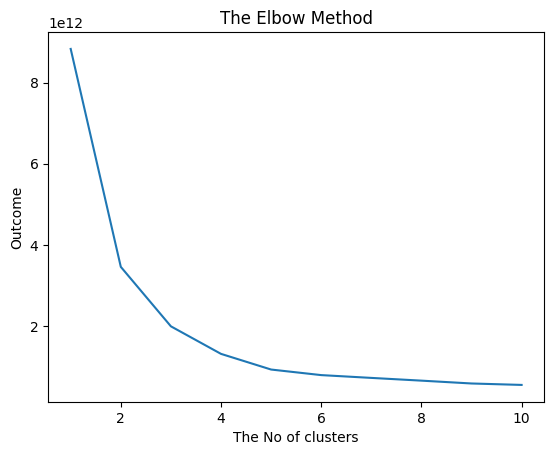

In [12]:
#Visualization of clusters using elbow’s method

plt.plot(range(1,11),my_val)

plt.xlabel('The No of clusters')

plt.ylabel('Outcome')

plt.title('The Elbow Method')

plt.show()

In [13]:
clustering_kmeans = KMeans(n_clusters=3, init='k-means++')
cleaned_data['clusters'] = clustering_kmeans.fit_predict(cleaned_data)

"""
kmeans = KMeans(n_clusters = 3, init='k-means++')

kmeans.fit(cleaned_data)


#To show centroids of clusters 

kmeans.cluster_centers_



#Prediction of K-Means clustering 

y_kmeans = kmeans.fit_predict(cleaned_data)

y_kmeans
"""

"\nkmeans = KMeans(n_clusters = 3, init='k-means++')\n\nkmeans.fit(cleaned_data)\n\n\n#To show centroids of clusters \n\nkmeans.cluster_centers_\n\n\n\n#Prediction of K-Means clustering \n\ny_kmeans = kmeans.fit_predict(cleaned_data)\n\ny_kmeans\n"

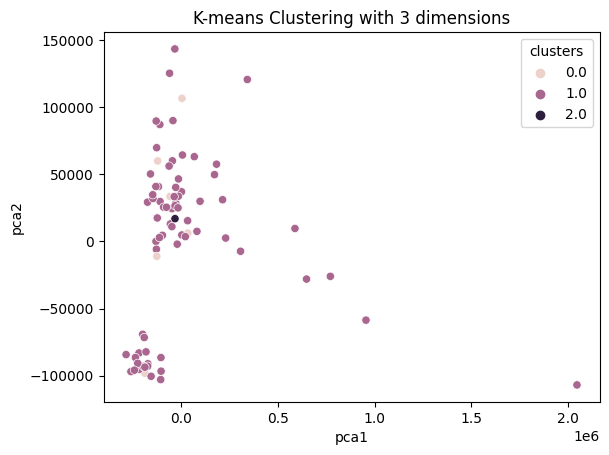

In [16]:
"""
plt.scatter(cleaned_data[y_kmeans == 0,0], X_val[y_kmeans == 0,1], c='red',s=100)

plt.scatter(cleaned_data[y_kmeans == 1,0], X_val[y_kmeans == 1,1], c='green',s=100)

plt.scatter(cleaned_data[y_kmeans == 2,0], X_val[y_kmeans == 2,1], c='orange',s=100)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='brown')

plt.title('K-Means Unsupervised Learning')

plt.show()
"""
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(cleaned_data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=cleaned_data['clusters'], data=results)
plt.title('K-means Clustering with 3 dimensions')
plt.show()